In [ ]:
'''
Sia f(x) = 3 exp(-abs(x-2)/3) sin^2(x-1) + 5 exp[-(x+1)^2] cos^4[2(x+1)]
definita in [a,b] = [-10,14].

-si rappresenti il grafico di f;
-si definisca la derivata f' e se ne rappresenti il grafico;
-si determinino le coordinate del punto di massimo assoluto di f;
-si determinino gli zeri di f' in [a,b];
-si determini l'integrale di f definito in [a,b] con i tre metodi (trapezi, Monte Carlo, Media);
-si definisca la primitiva di f, F(x), rispetto x0 = 0. Se ne rappresenti il grafico;
-si produca un file di testo con le colonne x, f(x), f'(x), F(x).

Sia data la distribuzione di probabilità la cui PDF è f(x):

-si trovi la sua costante di normalizzazione;
-si trovi la sua media;
-si trovino la varianza e la deviazione standard;
-si trovi la FWHM.
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
eps=10**(-10)
N=5000

def f(x):
    return 3*np.exp(-abs(x-2)/3)*np.sin(x-1)**2 + 5*np.exp(-(x+1)**2)*np.cos(2*(x+1))**4

def f1(x):
    return (f(x+eps)-f(x))/eps

def I(g,a,b):
    A=0
    dx=(b-a)/N
    for k in range(N):
        dA = dx/2 * (g(a+k*dx) + g(a+(k+1)*dx))
        A+=dA
    return A

def F(x):
    return I(f,0,x)

X=np.linspace(-10,14,N)
Y=f(X)
Y1=f1(X)
Y2=F(X)

S=I(f,-10,14)

xM = X[Y.argmax()]
yM = Y.max()
M = (round(xM,6), round(yM,6))

file = open('tab.txt','w')
file.write('X     -     f(X)     -     f1(X)     -     F(X)\n')
sp = '     '
for k in range(N):
    file.write(str(round(X[k],6)) +sp+ str(round(Y[k],6)) +sp+ str(round(Y1[k],6)) +sp+ str(round(Y2[k],6)) +'\n')
file.close()


norm = 1/S

def fm(x):
    return x*f(x)
mi = I(fm,-10,14)*norm

def fs(x):
    return (x-mi)**2*f(x)
s2 = I(fs,-10,14)*norm
s=np.sqrt(s2)

d=[]
for k in range(N-1):
    if (Y[k]<yM/2 and Y[k+1]>yM/2) or (Y[k]>yM/2 and Y[k+1]<yM/2):
        d.append((X[k]+X[k+1])/2)
FWHM = d[1]-d[0]


def Z(a,b):
    z=[]
    a0=a
    b0=b
    if f1(a)==0:
        z.append(round(a,6))
        a+=eps
    if f1(b)==0:
        z.append(round(b,6))
        b-=eps
    while abs(b-a)>=eps:
        c=(a+b)/2
        if f1(c)==0:
            z.append(round(c,6))
            break
        elif f1(a)*f1(c)<0:
            b=c
        else:
            a=c
    if abs(b0-c)>=eps:
        z.append(round(c,6))

    a=a0
    b=b0
    return z

H=[]
n=50
dx=24/n
for k in range(n):
    H+= Z(-10+k*dx,-10+(k+1)*dx)
if f1(14)==0:
    H.append(14)

D=[]
for i in range(len(H)):
    for j in range(i+1,len(H)):
        if H[i]==H[j]:
            D.append(H[i])
for i in range(len(D)):
    H.remove(D[i])

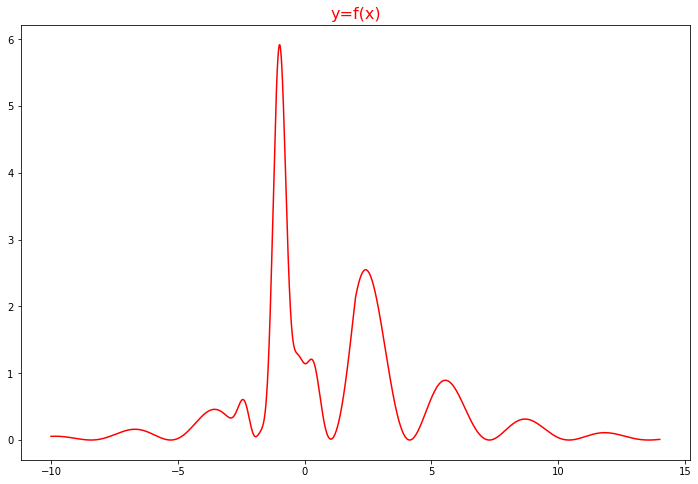

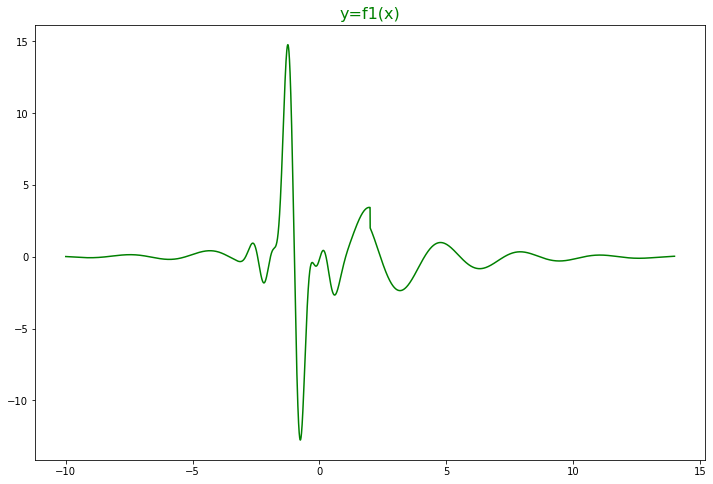

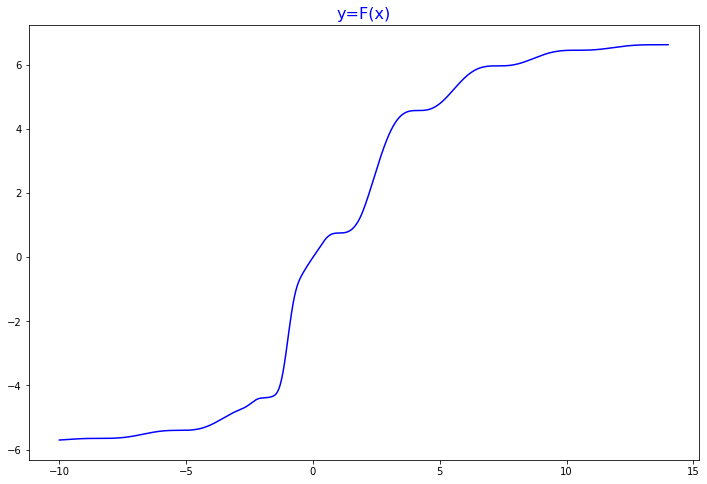

Il punto di massimo assoluto di f è: M = (-0.988598, 5.919604) 

Gli zeri di f1 sono:
 [-9.830426, -8.424778, -6.688833, -5.283185, -3.549585, -2.910513, -2.435736, -1.929445, -0.987438, 0.030611, 0.261908, 1.034713, 2.405591, 4.141593, 5.54724, 7.283185, 8.688834, 10.424778, 11.830425, 13.566371]
Segue una verifica grafica:


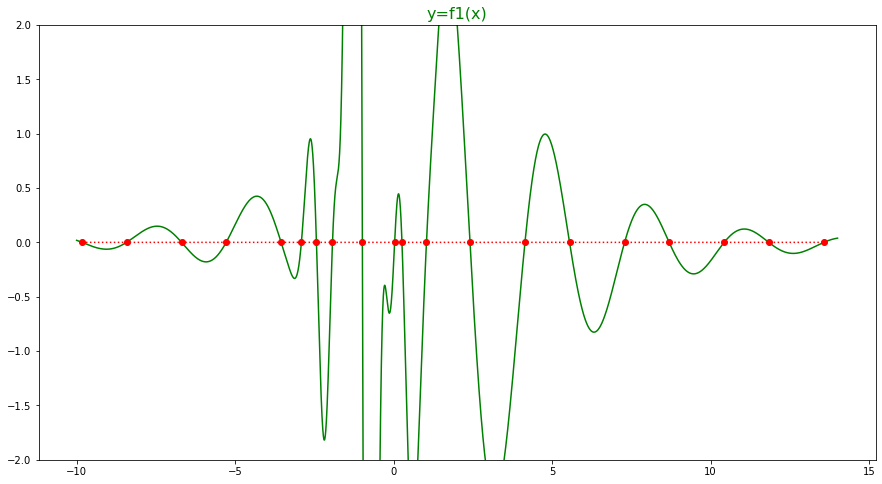

L'integrale esteso ad [a,b] di f è: I = 12.330037 

Segue che la costante di normalizzazione è: N = 1/I = 0.081103 

Media: m = 1.181664 ; varianza: s2 = 11.80061 ; dev.st.: s = 3.435202 

Larghezza a metà altezza: FWHM = 0.609722
Segue una verifica grafica:


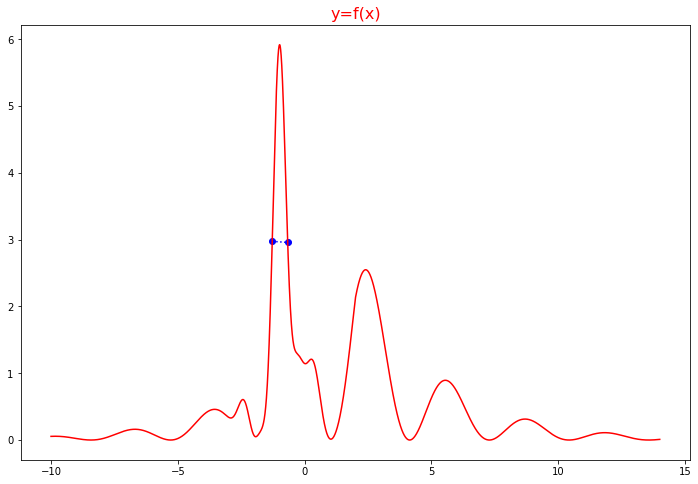

X     -     f(X)     -     f1(X)     -     F(X)
-10.0     0.054946     0.018802     -5.70174
-9.995199     0.055035     0.018304     -5.701476
-9.990398     0.055122     0.017803     -5.701212
-9.985597     0.055206     0.017301     -5.700947
-9.980796     0.055288     0.016795     -5.700682
-9.975995     0.055367     0.016287     -5.700416
-9.971194     0.055444     0.015777     -5.70015
-9.966393     0.055519     0.015265     -5.699884
-9.961592     0.055591     0.014751     -5.699617
-9.956791     0.05566     0.014234     -5.69935
-9.95199     0.055727     0.013715     -5.699083
-9.947189     0.055792     0.013194     -5.698815
-9.942388     0.055854     0.012671     -5.698547
-9.937588     0.055914     0.012146     -5.698279
-9.932787     0.055971     0.011619     -5.69801
-9.927986     0.056025     0.01109     -5.697741
-9.923185     0.056077     0.010559     -5.697472
-9.918384     0.056127     0.010027     -5.697203
-9.913583     0.056173     0.009492     -5.696933
-9.908782    

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X,Y,'red')
plt.title('y=f(x)',color='red',size=16)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(X,Y1,'green')
plt.title('y=f1(x)',color='green',size=16)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(X,Y2,'blue')
plt.title('y=F(x)',color='blue',size=16)
plt.show()

print('Il punto di massimo assoluto di f è: M =',M,'\n')
print('Gli zeri di f1 sono:\n',H)
print('Segue una verifica grafica:')
plt.figure(figsize=(15,8))
plt.plot(X,Y1,'green')
plt.plot(np.array(H),f1(np.array(H)),'o:',color='red')
plt.title('y=f1(x)',color='green',size=16)
plt.ylim((-2,2))
plt.show()

print("L'integrale esteso ad [a,b] di f è: I =",round(S,6),'\n')

print('Segue che la costante di normalizzazione è: N = 1/I =',round(norm,6),'\n')
print('Media: m =',round(mi,6),'; varianza: s2 =',round(s2,6),'; dev.st.: s =',round(s,6),'\n')
print('Larghezza a metà altezza: FWHM =',round(FWHM,6))
print('Segue una verifica grafica:')
plt.figure(figsize=(12,8))
plt.plot([d[0],d[1]],[f(d[0]),f(d[1])],'o:',color='blue')
plt.plot(X,Y,'red')
plt.title('y=f(x)',color='red',size=16)
plt.show()

file=open('tab.txt')
print(file.read())
file.close()